In [65]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [67]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject_BA/DIG Historical Data.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/22/2024,"31,950.0","32,300.0","32,800.0","31,100.0",24.60M,0.79%
1,03/21/2024,"31,700.0","30,900.0","32,100.0","29,900.0",44.81M,4.28%
2,03/20/2024,"30,400.0","29,850.0","30,800.0","29,550.0",29.50M,1.67%
3,03/19/2024,"29,900.0","30,950.0","30,950.0","29,900.0",28.34M,-1.81%
4,03/18/2024,"30,450.0","28,900.0","30,450.0","28,800.0",78.93M,6.84%


In [68]:
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = df.Price.astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df=df[::-1]

In [69]:
df.set_index('Date', inplace=True)

In [70]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-02,11033.2,"11,006.7","11,059.8","10,927.1",1.60M,0.97%
2018-01-03,11457.6,"11,059.8","11,563.7","11,033.2",5.98M,3.85%
2018-01-04,12094.1,"11,590.2","12,253.3","11,537.2",7.17M,5.56%
2018-01-05,12094.1,"12,279.8","12,545.0","11,935.0",5.20M,0.00%
2018-01-08,12200.2,"12,094.1","12,412.4","11,988.0",7.27M,0.88%


In [71]:
#Chuẩn hóa dữ liệu
df1=df.reset_index()['Price']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [72]:
df1

array([[0.04848431],
       [0.05311725],
       [0.06006556],
       ...,
       [0.25990094],
       [0.27409232],
       [0.27682144]])

In [73]:
# Prepare the dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [74]:
time_step = 100
X, y = create_dataset(df1, time_step)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [75]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [76]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate mean absolute error
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)

print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

Train MAE: 598.2727411848481
Test MAE: 634.0577919077905


In [96]:
# Predict future 30 days
x_input = df1[len(df1) - time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step
i = 0
while (i < 90):
    if (len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

In [97]:
# Inverse transform the future predictions
future_predict = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

In [98]:
future_predict

array([[31984.21859533],
       [31943.02788029],
       [31921.77010628],
       [31996.16921585],
       [32182.89429661],
       [33213.48478041],
       [33180.26720936],
       [33278.17310521],
       [34004.43421874],
       [33767.07844168],
       [33271.98078093],
       [33181.75533656],
       [33062.53518862],
       [32790.81069986],
       [32384.20257677],
       [32517.37632542],
       [32064.80697392],
       [31912.06937627],
       [32316.95445222],
       [32556.49300315],
       [32270.02357889],
       [32081.75883764],
       [32091.81336853],
       [31633.20171509],
       [31581.51657864],
       [31757.08160252],
       [31314.85347823],
       [31483.72837589],
       [31485.967264  ],
       [31365.32844442],
       [31461.44379356],
       [31871.78375006],
       [32210.87516015],
       [31903.09996528],
       [31743.00869626],
       [31832.10287062],
       [31613.05453314],
       [31620.67635686],
       [31981.63039156],
       [31881.86165554],


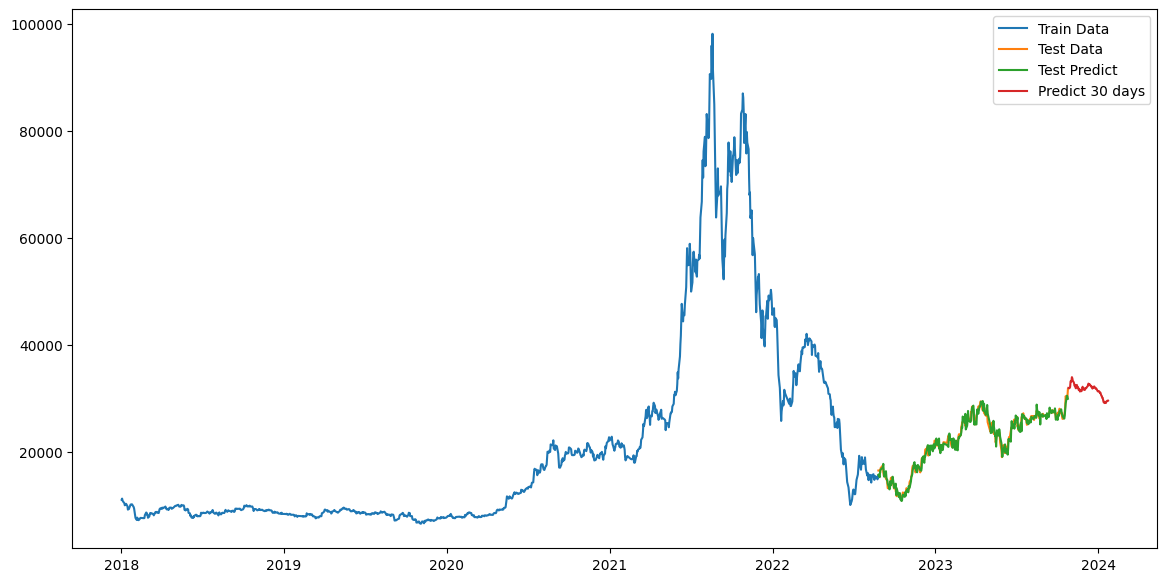

In [99]:
# Calculate the start and end dates for the future predictions
start_date = df.index[-1] + pd.Timedelta(days=1)
end_date = start_date + pd.Timedelta(days=89)  # 30 days including start_date
predict_dates = pd.date_range(start=start_date, end=end_date)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot train data
plt.plot(df.index[:train_size], y_train, label='Train Data')

# Plot test data
plt.plot(df.index[train_size:train_size + test_size], y_test, label='Test Data')

# Plot test predict data
plt.plot(df.index[train_size:train_size + test_size], test_predict, label='Test Predict')

last_test_date = df.index[train_size + test_size - 1]
future_predict_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90)
plt.plot(future_predict_dates, future_predict, label='Predict 30 days')


# Display the legend
plt.legend()

# Display the plot
plt.show()